In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import random
import modules.clean_script
import modules.lines_to_txt
import os
import PIL

from modules.clean_script import clean_script
from modules.lines_to_txt import lines_to_txt
from os import path
from PIL import Image, ImageDraw, ImageFont
from wordcloud import WordCloud, STOPWORDS

# force reload of custom modules
import importlib
importlib.reload(modules.clean_script);
importlib.reload(modules.lines_to_txt);

# set up logging
logging.getLogger().setLevel(logging.INFO)

In [21]:
DATA_PATH = "data/lotr_dataset.csv"

script_df = pd.read_csv("data/lotr_scripts.csv")
char_df = pd.read_csv("data/lotr_characters.csv")

# Clean script from modules/clean_script.py
lotr_df, script_df, char_df = clean_script(script_df, char_df, out_path=DATA_PATH)

script.csv cleaned and saved to data/lotr_dataset.csv


In [22]:
def show_dialog(script, index=None, after=0):

    if index is None:
        random.randint(0, len(script))

    for i in range(after):
        char=script.iloc[index+i]["char"].upper()
        line=script.iloc[index+i]["dialog"]
        print(f"{char}:")
        print(f"{line}")

# show dialog:
show_dialog(lotr_df, random.randint(0, len(lotr_df)), 3)

SAM:
"Samwise the Brave."
FRODO:
Smeagol?
SAM:
We're not going to wait for you. Come on.,


In [23]:
lines_per_char = lotr_df.char.value_counts().to_dict();
lines_per_race = lotr_df.race.value_counts().to_dict();
lines_per_gender = lotr_df.gender.value_counts().to_dict();

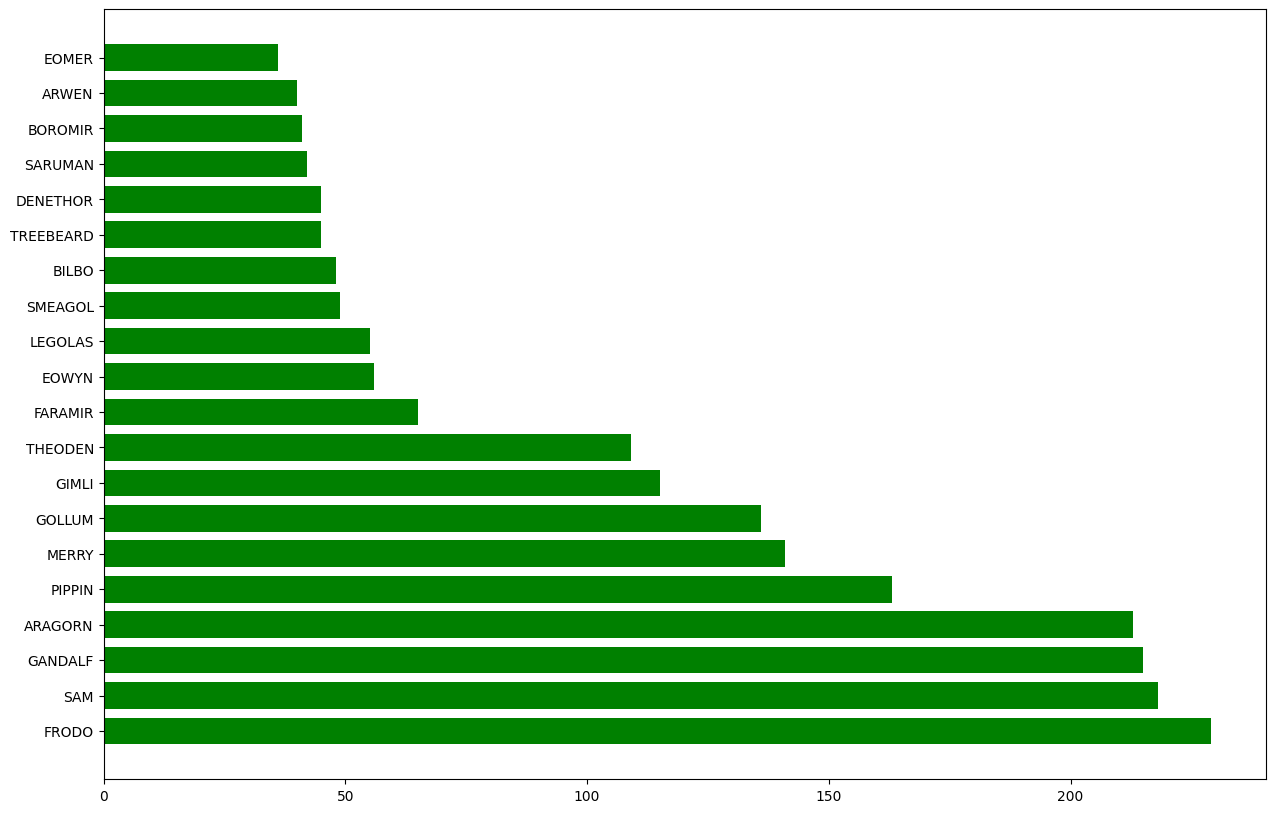

In [109]:
plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_per_char))[:20], sorted(list(lines_per_char.values()), reverse=True)[:20], height=0.75, align='center', color='green');
plt.yticks(range(len(lines_per_char))[:20], list(lines_per_char.keys())[:20]);

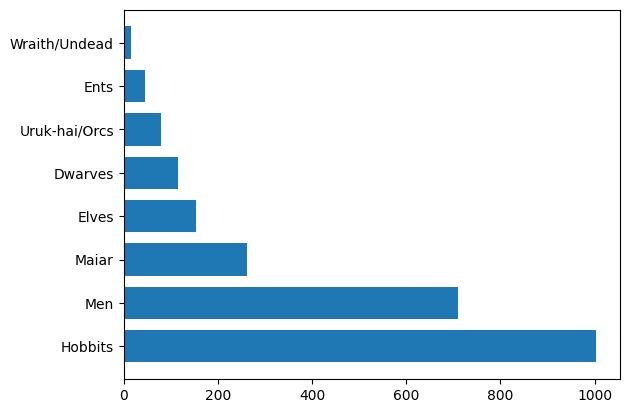

In [25]:
plt.barh(range(len(lines_per_race)), sorted(list(lines_per_race.values()), reverse=True), height=0.75, align='center');
plt.yticks(range(len(lines_per_race)), list(lines_per_race.keys()));

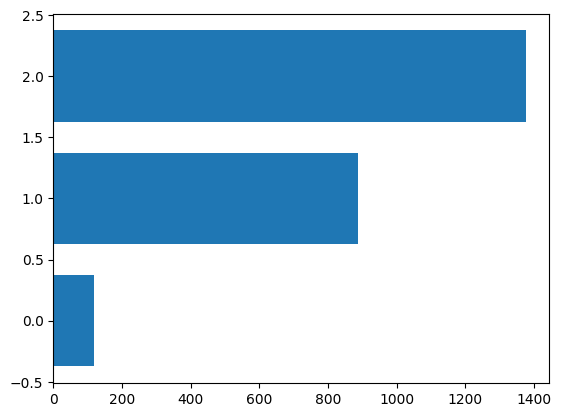

In [26]:
plt.barh(range(len(lines_per_gender))[:20], sorted(list(lines_per_gender.values())[:20], reverse=False), height=0.75, align='center');

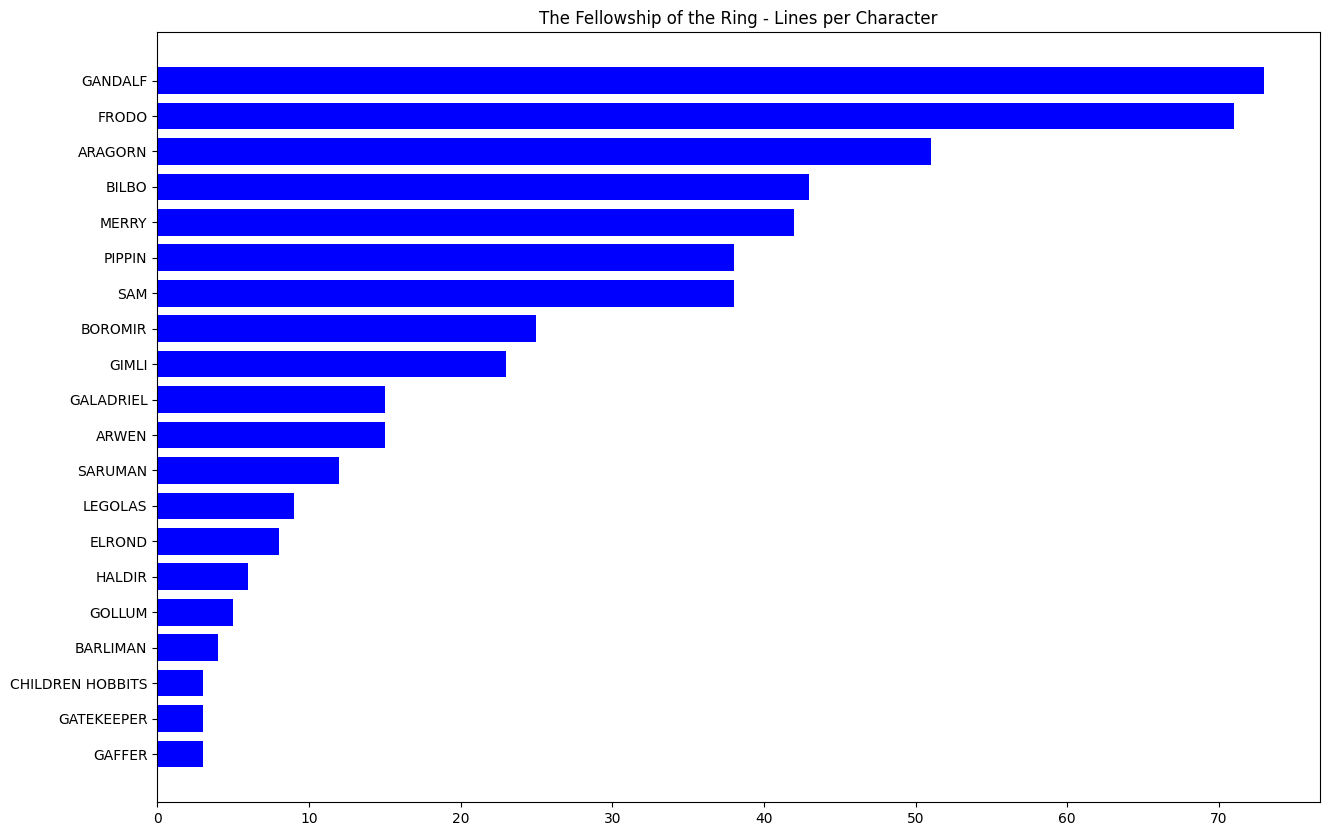

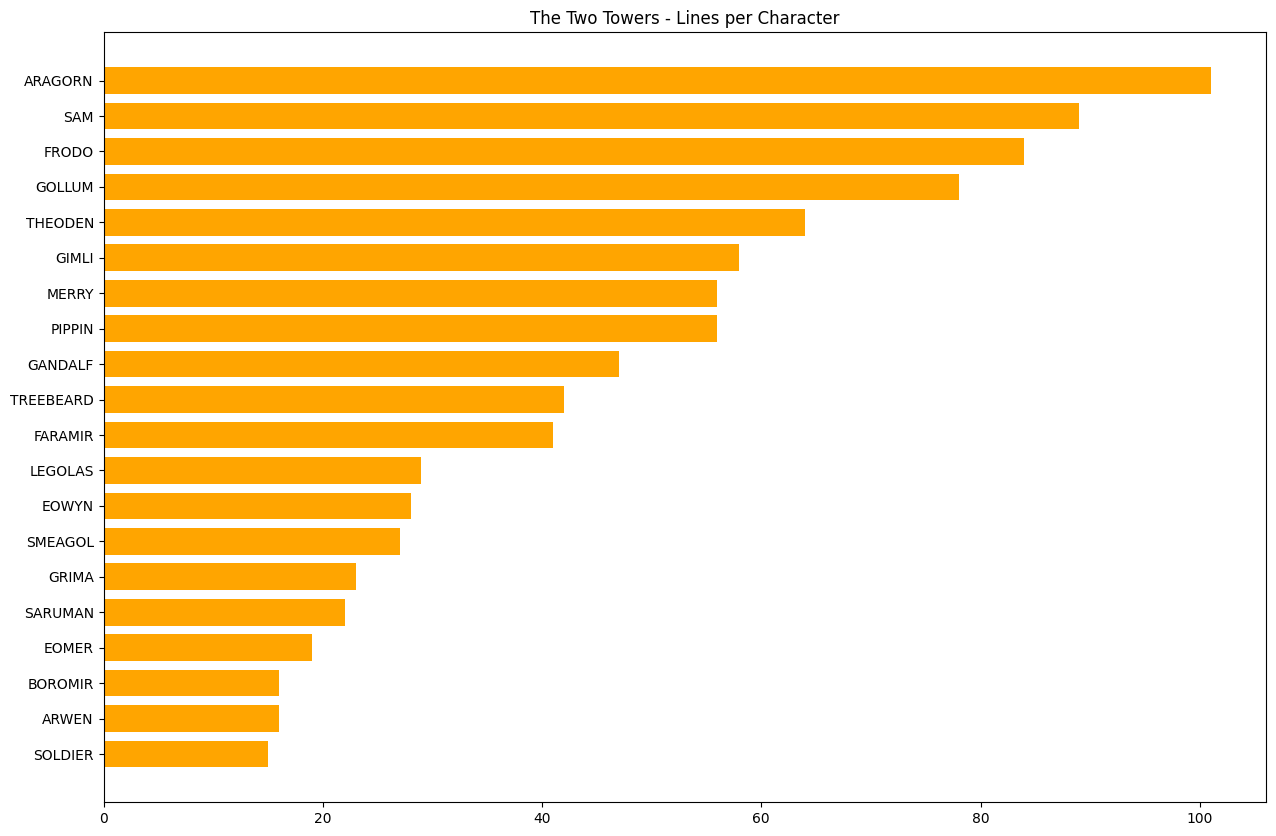

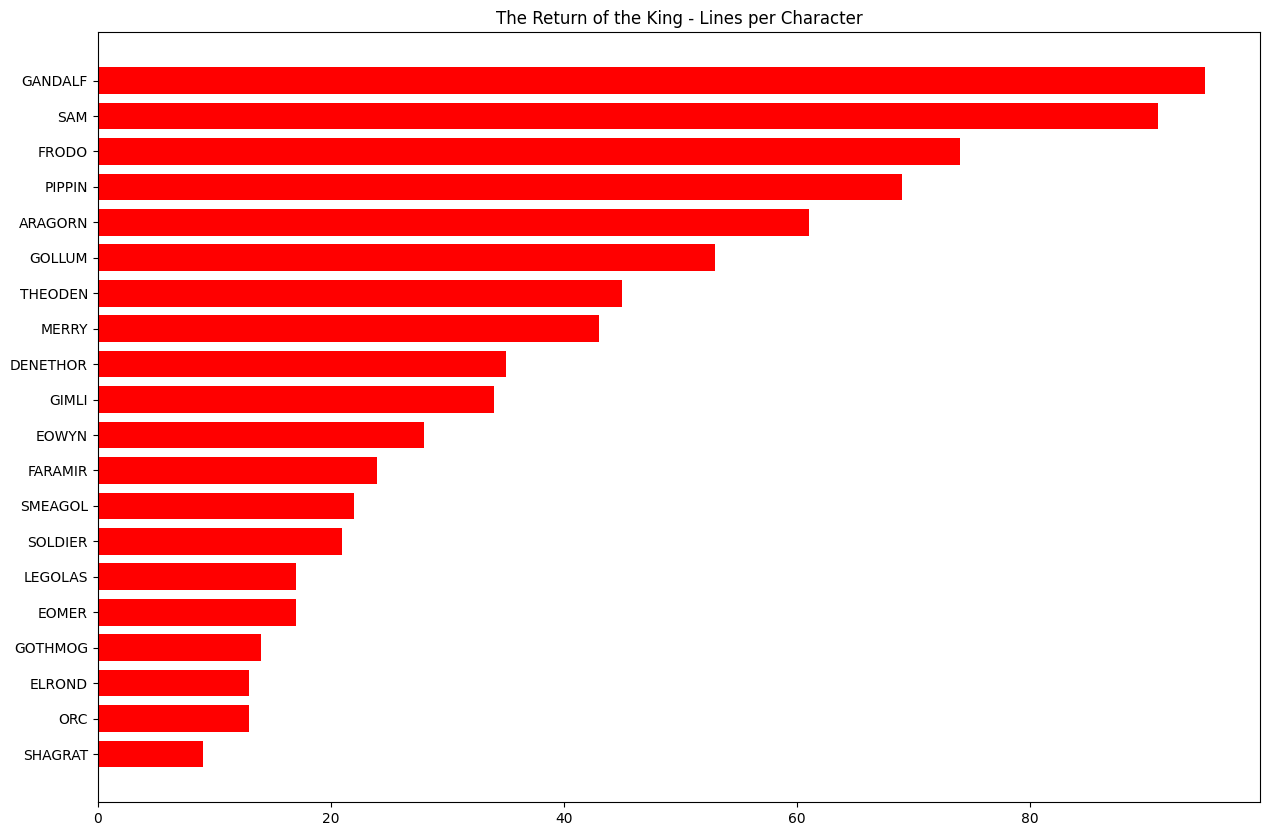

In [110]:
lines_char_FOTR = lotr_df.loc[lotr_df["movie"]=="The Fellowship of the Ring "].char.value_counts().to_dict();
lines_char_TTT = lotr_df.loc[lotr_df["movie"]=="The Two Towers "].char.value_counts().to_dict();
lines_char_ROTK = lotr_df.loc[lotr_df["movie"]=="The Return of the King "].char.value_counts().to_dict();

plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_char_FOTR))[:20], sorted(list(lines_char_FOTR.values())[:20], reverse=False), height=0.75, align='center', color='blue');
plt.yticks(range(len(lines_char_FOTR))[:20], list(lines_char_FOTR.keys())[:20][::-1]);
plt.title("The Fellowship of the Ring - Lines per Character");

plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_char_TTT))[:20], sorted(list(lines_char_TTT.values())[:20], reverse=False), height=0.75, align='center', color='orange');
plt.yticks(range(len(lines_char_TTT))[:20], list(lines_char_TTT.keys())[:20][::-1]);
plt.title("The Two Towers - Lines per Character");

plt.figure(figsize=(15, 10));
plt.barh(range(len(lines_char_ROTK))[:20], sorted(list(lines_char_ROTK.values())[:20], reverse=False), height=0.75, align='center', color='red');
plt.yticks(range(len(lines_char_ROTK))[:20], list(lines_char_ROTK.keys())[:20][::-1]);
plt.title("The Return of the King - Lines per Character");


In [27]:
#lines_to_txt(DATA_PATH);
lines_to_txt(DATA_PATH);

Lines written to data/lotr_lines.txt


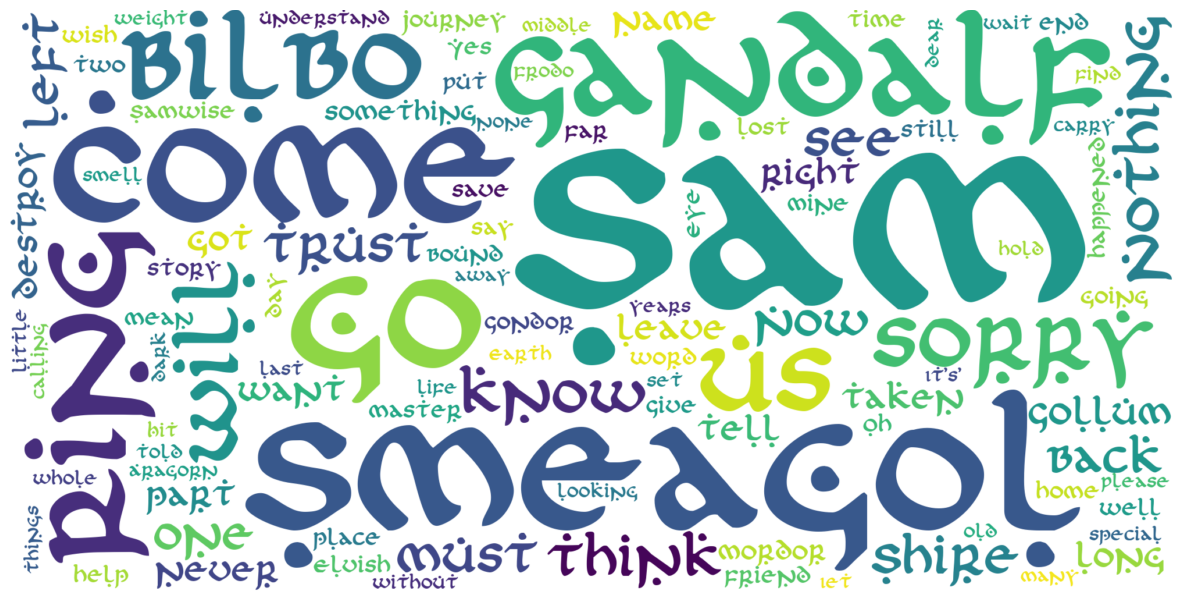

In [111]:
with open("data/frodo_lines.txt", "r") as f:
    text = f.read()

stopwords = set(STOPWORDS);
wc = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=2000, height=1000);

# generate word cloud
wc.generate(text);

# show
plt.figure(figsize=(15, 10));
plt.imshow(wc, interpolation='bilinear');
plt.axis("off");

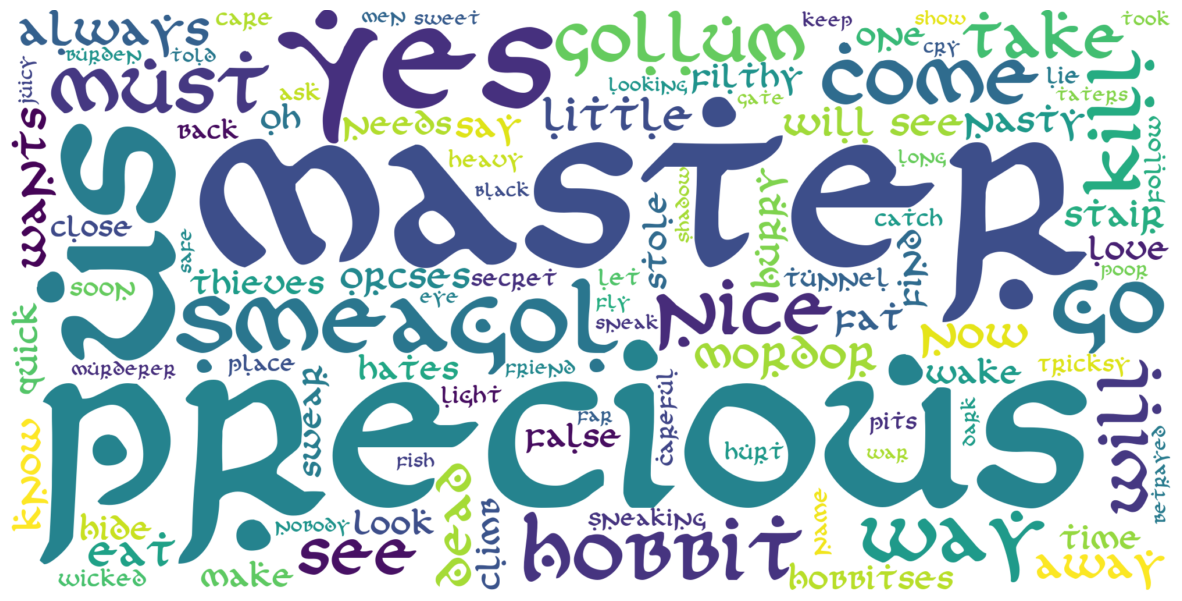

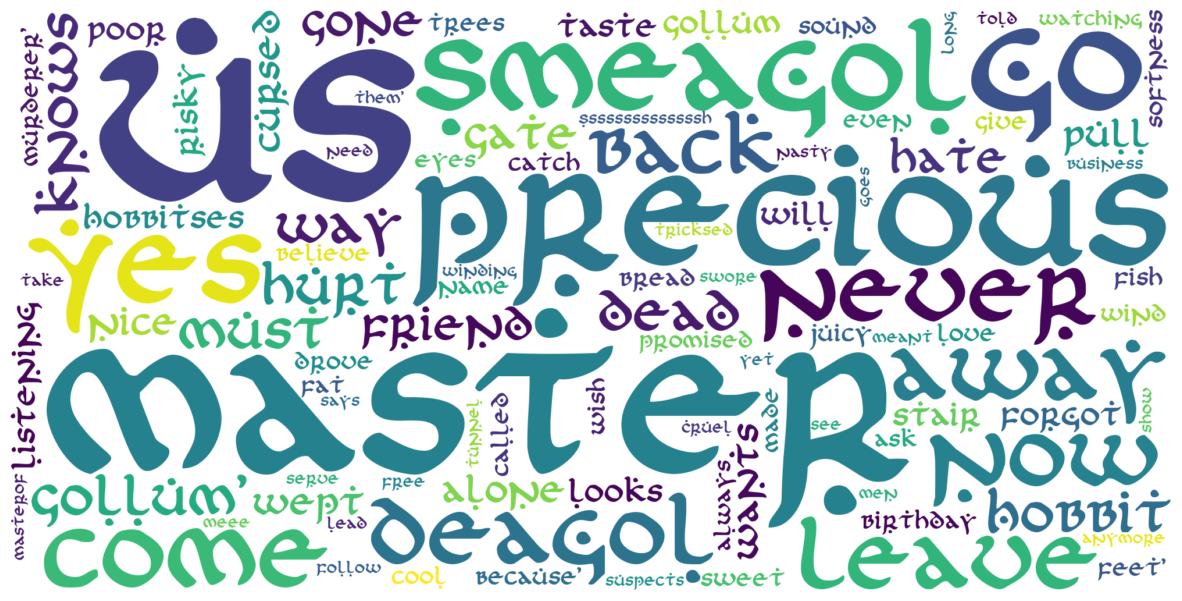

In [32]:
with open("data/gollum_lines.txt", "r") as f:
    text1 = f.read()

with open("data/smeagol_lines.txt", "r") as f:
    text2 = f.read()

stopwords = set(STOPWORDS);
wc1 = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=2000, height=1000);
wc2 = WordCloud(max_words=100, stopwords=stopwords, font_path='first-order.ttf',
               background_color="white", width=2000, height=1000);

# generate word cloud
wc1.generate(text1);
wc2.generate(text2);

# show
plt.figure(figsize=(15, 10));
plt.imshow(wc1, interpolation='bilinear');
plt.axis("off");

plt.figure(figsize=(15, 10));
plt.imshow(wc2, interpolation='bilinear');
plt.axis("off");

Plot over image

Most common trigrams
Most common bigrams
Sentiment Analysis
gollum vs. smeagol sentiment

Transformer Race Text Classifier Model - using also the hobbit
LOTRGPT
First whole model Karpathy style then fine-tuning using GPT-2/BERT